In [1]:
%matplotlib inline
import sys
from collections import defaultdict

if "../" not in sys.path:
    sys.path.append("../")
    
import numpy as np
from lib.envs.GridEnv import Env
from lib.utils.draw import show_grid,show_policy,draw_line
import matplotlib
# nice seed ! 
# env = Env( (20, 20),p=0.4,seed=5,punish=-100)
env = Env( (10, 10),p=0.4,seed=6,punish=-10)

In [2]:
def get_epsilon_policy(Q,nA,num_episodes):
    
    # 逐渐递减的 eps
    explore_frac = 0.1
    epsilon = lambda i: 1 - 0.99 * min(1, i / (num_episodes * explore_frac))

    def policy_fn(observation,i_episode):
        # eps = epsilon(i_episode)
        # 全随机探索
        eps = 0.1
        A = np.ones(nA) * eps / nA
        best_action = np.argmax(Q[observation])
        A[best_action] += (1 - eps)
        return A
    return policy_fn

In [3]:
def Q_learning_TD_control(env,num_episodes,gamma=0.9,alpha =0.5):
    
    Q = np.zeros( (env.observation_size,env.action_size) )
    policy = get_epsilon_policy(Q,env.action_size,num_episodes)
    
    last_step = 0   
    stats = defaultdict(lambda: [])
    for i_episode in range(num_episodes):
        if i_episode % 10 == 0:
            #\r 实现动态更新
            print(f"\r Episode :{i_episode/num_episodes * 100:.2f}%  last step: {last_step:4}",end = "")
            sys.stdout.flush()
        last_step = 0
        total_reward = 0
        # 
        state = env.reset()

        
        while True:
            last_step += 1
            action_probs = policy(state,i_episode)
            action = np.random.choice(np.arange(len(action_probs)), p=action_probs)
            next_state, reward, done = env.step(action)


            # TD update
            best_action = np.argmax(Q[next_state])
            td_target = reward + gamma * Q[next_state][best_action]
            td_error = td_target - Q[state][action]
            Q[state][action] += alpha * td_error
            
            total_reward += reward
            if done:
                break
            state = next_state
        # stats information
        stats['steps'].append(last_step)
        stats['rewards'].append(total_reward)
    
    return Q,stats

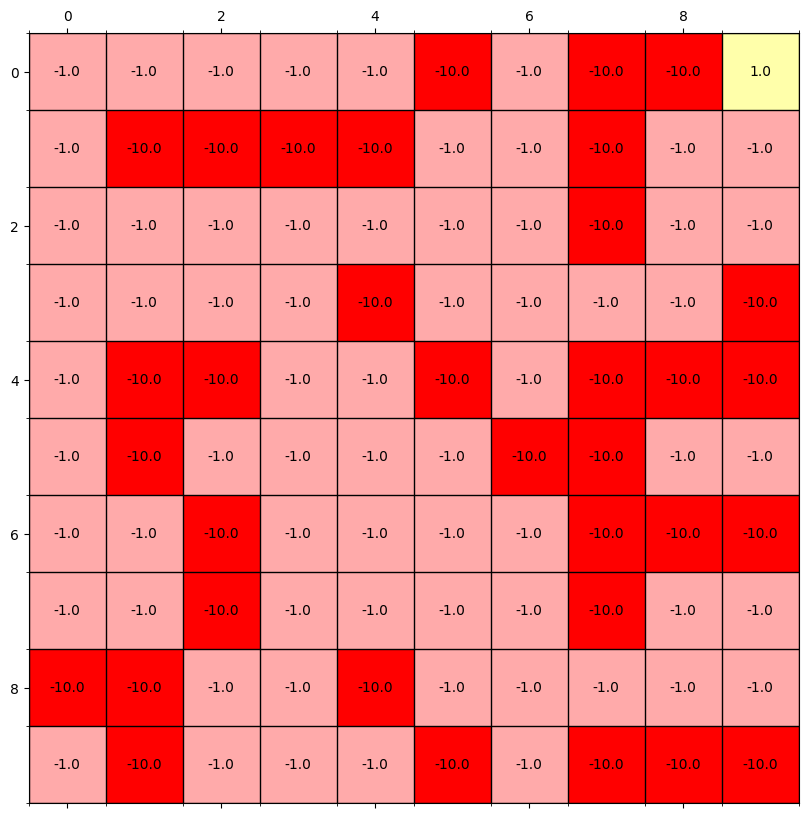

 Episode :98.00%  last step:   15

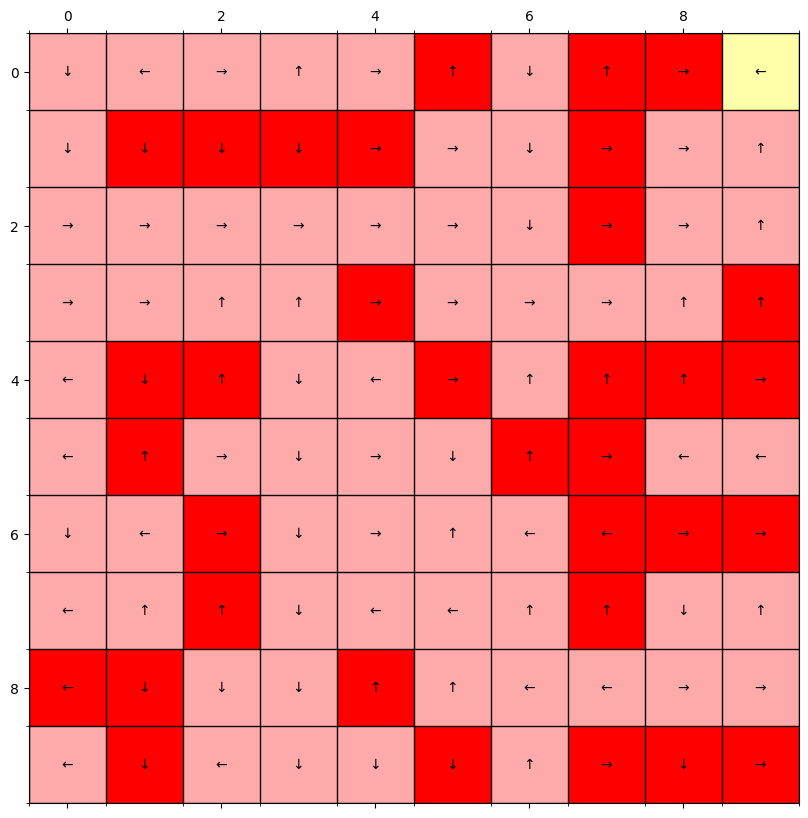

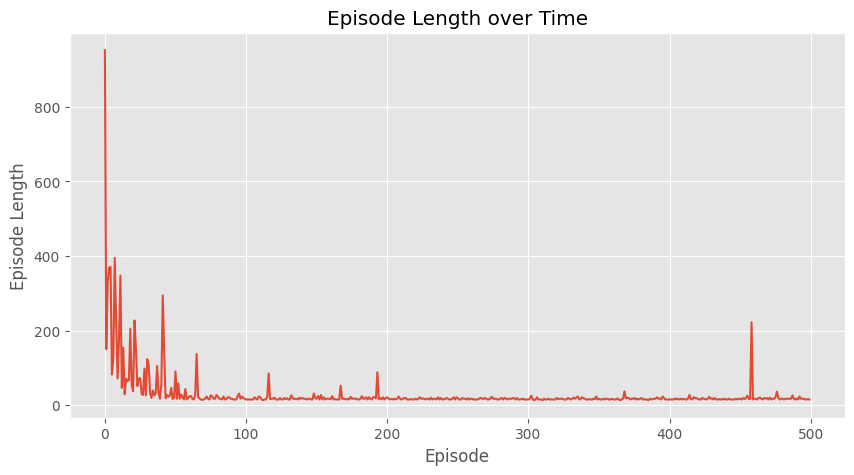

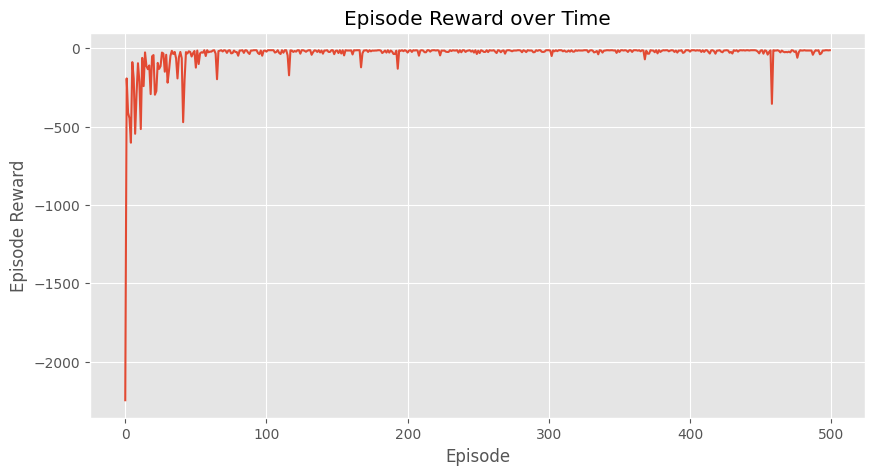

In [4]:
show_grid(env,env.grid)
num_episodes = 500
Q,stats = Q_learning_TD_control(env,num_episodes=num_episodes,gamma=0.99,alpha=0.3)
V = np.zeros( env.observation_size )
policy = np.zeros_like(Q)
for i in range(len(V)):
    best_action = np.argmax(Q[i])
    V[i] = Q[i][best_action]
    policy[i][best_action] = 1
show_policy(env,policy)
draw_line(stats)


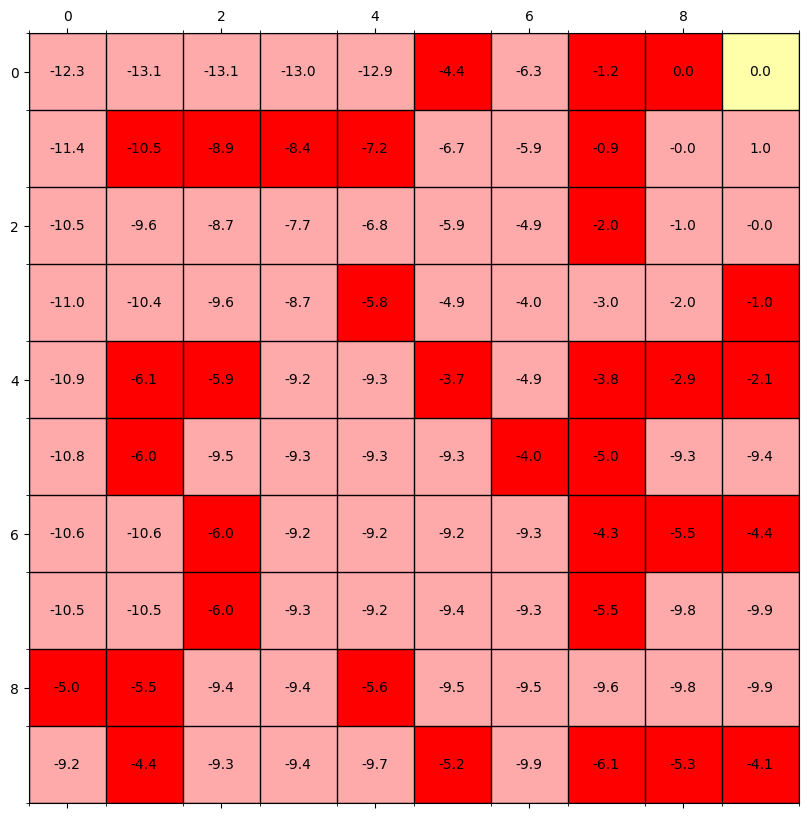

In [5]:
show_grid(env,V)